<a href="https://colab.research.google.com/github/RoseBorges44/data_science/blob/main/01_HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SOBRE O CASE *HOUSE PRICES***

Usaremos os dados de um *data set* do Kaggle.


Os preços dos imóveis são indicadores cruciais no mercado imobiliário, sendo influenciados por diversos fatores, como oferta, demanda, condições econômicas e localização.

Esta análise explora a dinâmica por trás dos preços das casas.

Neste projeto, nosso objetivo é desenvolver um modelo capaz de prever o valor estimado de imóveis com base em diversas características relevantes.



## Importação das Bibliotecas utilizadas

In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

In [3]:
# Acessando o data set
df = pd.read_csv('/content/kc_house_data.csv')

# Análise dos Dados

In [4]:
# Ver as primeiras entradas
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Resumo das informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

*Não temos valores nulos.*

In [6]:
# ver se há resultados nulos
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

*Não temos dados ausentes, o que faz sentido.
Como o dataset é sobre casas vendidas, sabemos os dados dela, como número de quartos que a casa tinha antes de vendê-la.*

In [7]:
# Ver o resumo estatístico
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Podemos observar alguns particularidades:
- A quantidade média de quartos e área quadrada das casa é de:
     - 3 quartos
     - 290 metros quadrados
- A quantidade máxima de quartos e área quadrada é de:
     - 33 quartos
     - 13.450 metros quadrados

*Uma casa onde a tem 33 quartos e 13.450 metros quadrados, parece ser uma casa enorme e pode distorcer nossas análises.*

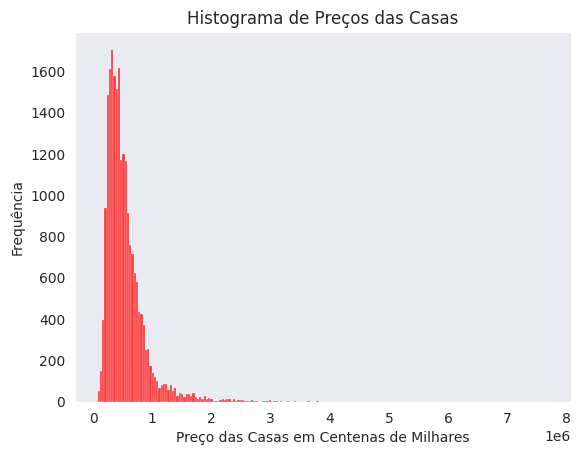

In [9]:
# Plota o histograma com Seaborn.
sns.histplot(df['price'], bins=200, color='red', edgecolor='white')

# Ajusta os rótulos dos eixos e o título do gráfico.
plt.xlabel('Preço das Casas em Centenas de Milhares')
plt.ylabel('Frequência')
plt.title('Histograma de Preços das Casas')

plt.show()

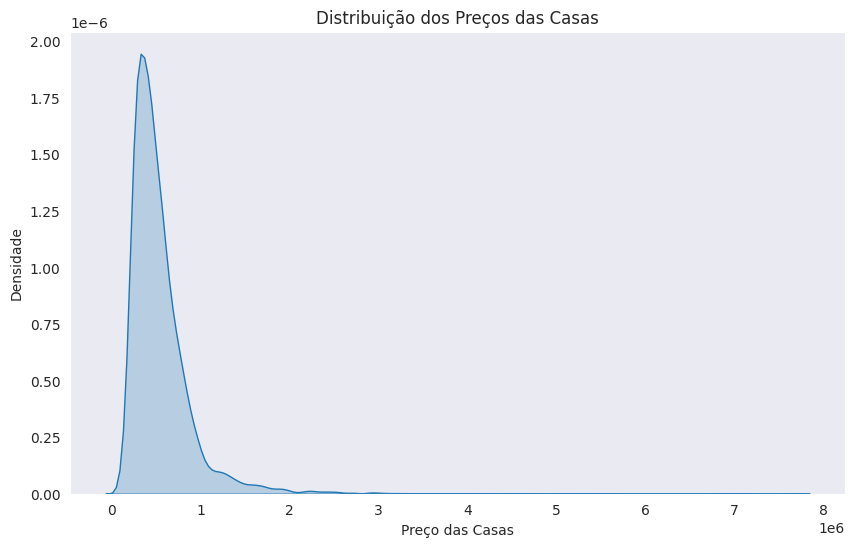

In [26]:
# Plotar o gráfico de densidade dos preços das casas
plt.figure(figsize=(10, 6))
sns.kdeplot(df['price'], fill=True)
plt.xlabel('Preço das Casas')
plt.ylabel('Densidade')
plt.title('Distribuição dos Preços das Casas')
plt.show()

*Observamos que é evidente que a grande maioria das nossas propriedades tem valores abaixo de 1 milhão de dólares.*

*Podemos notar a presença de valores extremos,  entre de 3 e 8 milhões, são propriedades de alto valor, que podem distorcer nossas análises.*

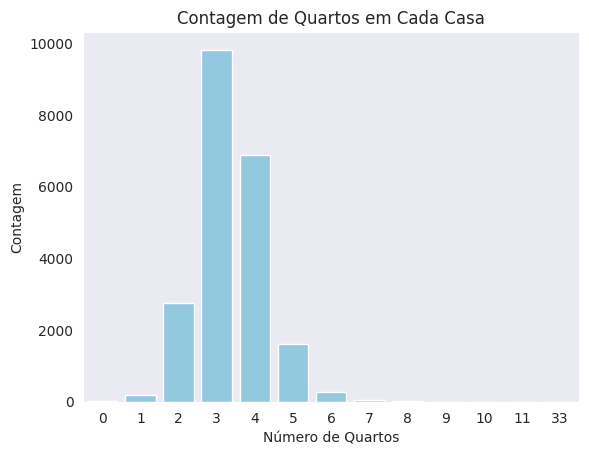

In [10]:
# Contar quantos quartos há em cada casa

bedroom_counts = df['bedrooms'].value_counts()
sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values, color='skyblue')
plt.title('Contagem de Quartos em Cada Casa')
plt.xlabel('Número de Quartos')
plt.ylabel('Contagem')
plt.show()

*Como podemos observar pela visualização, as casas de 3 quartos são as mais vendidas, seguidas pelas de 4 quartos.*

*Então é útil para uma construtora que tenha esses dados, ela pode fazer um novo empreendimento com 3 e 4 dormitórios para atrair mais compradores.*


> ### *Então agora sabemos que as casas abaixo de 1 Milhão de dólarese com 3 e 4 quartos são as mais vendidos. Vamos descobrir em qual localidade?*


In [12]:
# Correlações Pearson
df.corr()['price'].sort_values()

<ipython-input-12-ed03bf60e440>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

*A correlação de Pearson é uma medida estatística que indica o grau de relação linear entre duas variáveis.*

*Vemos que pés quadrados de área útil (sqft_living) têm uma correlação muito alta com o preço real da casa (price).*
<br/>


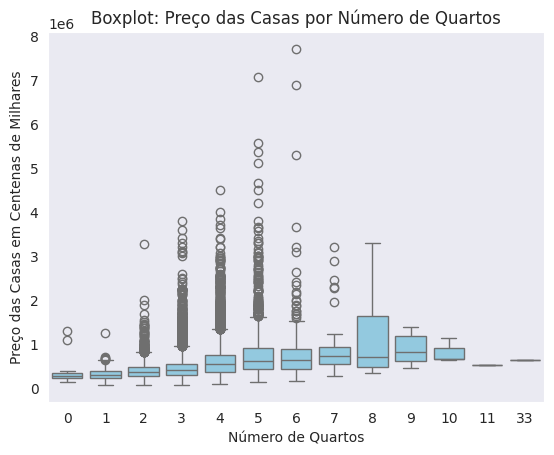

In [12]:
# Cria o gráfico de boxplot
sns.boxplot(x='bedrooms', y='price', data=df, color='skyblue')

# Define os rótulos dos eixos e o título do gráfico
plt.xlabel('Número de Quartos')
plt.ylabel('Preço das Casas em Centenas de Milhares')
plt.title('Boxplot: Preço das Casas por Número de Quartos')

plt.show()

*Este gráfico me permite visualizar como os preços das casas variam de acordo com o número de quartos.*

<br/>Vamos explorar esses dados altamente correlacionados por meio dos gráficos de dispersão.

## **Visualização da localização das casas com base na latitude e longitude.**

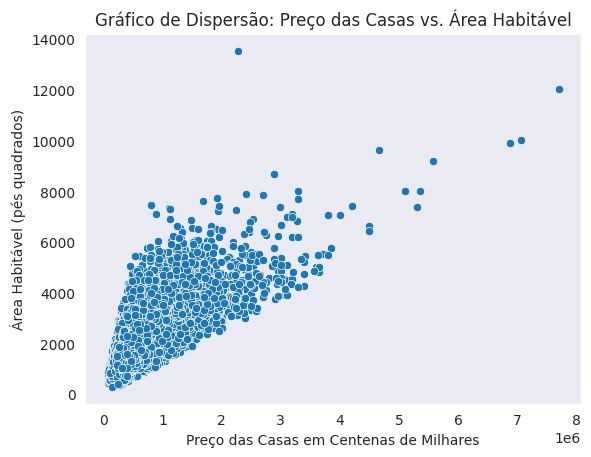

In [11]:
# Cria o gráfico de dispersão
sns.scatterplot(x='price', y='sqft_living', data=df)

# Define os rótulos dos eixos e o título do gráfico
plt.xlabel('Preço das Casas em Centenas de Milhares')
plt.ylabel('Área Habitável (pés quadrados)')
plt.title('Gráfico de Dispersão: Preço das Casas vs. Área Habitável')

plt.show()

*Podemos ver que quanto existe mais área habitável, maior o preço, embora os dados estejam concentrados em uma determinada zona de preço, mas a partir da figura podemos ver que os pontos de dados parecem estar em direção linear.*
<br/>
<br/>

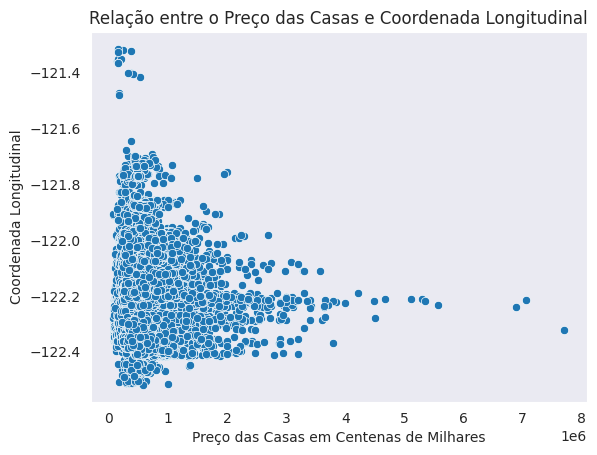

In [13]:
# Cria o gráfico de dispersão
sns.scatterplot(x='price', y='long', data=df)

# Adiciona rótulos e título ao gráfico
plt.xlabel('Preço das Casas em Centenas de Milhares')
plt.ylabel('Coordenada Longitudinal')
plt.title('Relação entre o Preço das Casas e Coordenada Longitudinal',)

plt.show()

*Esse gráfico nos diz sobre a localização das casas em termos de longitude e nos dá uma observação bastante interessante, de que -122,2 a -122,4, parece ser uma área residencial cara.*
<br/>
<br/>

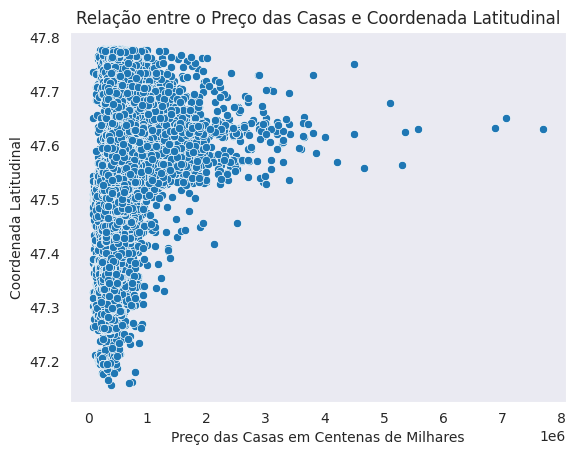

In [10]:
# Cria o gráfico de dispersão
sns.scatterplot(x='price', y='lat', data=df)

# Adiciona rótulos e título ao gráfico
plt.xlabel('Preço das Casas em Centenas de Milhares')
plt.ylabel('Coordenada Latitudinal')
plt.title('Relação entre o Preço das Casas e Coordenada Latitudinal',)

plt.show()

* E o mesmo comportamento parece surgir.*

*Parece também que em uma latitude específica há algum tipo de área habitacional cara.*

<br/>**Basicamente o que isso está nos dizendo é que parece que há uma certa combinação de latitude e longitude que tende a ser uma área cara.**
<br/>

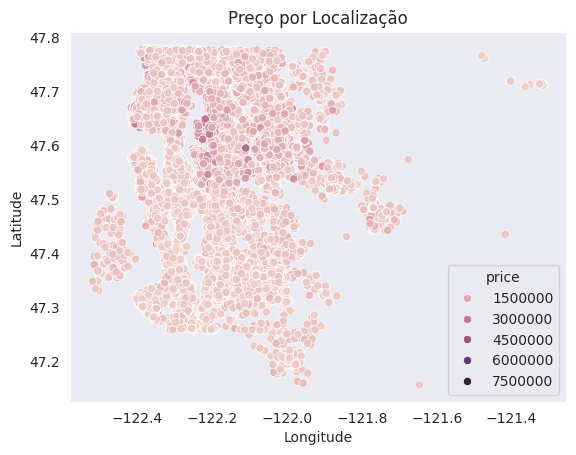

In [16]:
# Cria o gráfico de dispersão
sns.scatterplot(x='long',y='lat',data=df,hue='price')

# Adiciona rótulos e título ao gráfico
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Preço por Localização',)

plt.show()

*Colorimos com pontos mais escuros ou mais claros com base nos preços.*

In [17]:
# Classifica o DataFrame com base na coluna 'price' em ordem decrescente e exibe as 20 primeiras linhas
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


*Vamos dar uma olhada no DataFrames e classificar os valores com base no preço, em ordem decrescente e exibir as 20 primeiras linhas,*
<br/>
<br/>Vamos conferir as 20 casas mais caras.

- A mais cara neste conjunto de dados é de 7.7 milhões de dólares.

E, enquanto vamos descendo, notamos que o preço meio que cai rapidamente para algo mais razoável, como 3.6 milhões de dólares.
<br/>
<br/>Como sabemos que a grande maioria das nossas propriedades tem valores abaixo de 1 milhão de dólares, podemos fazer um corte nas propriedades.

In [17]:
# Número de Entradas no DataFrame
len(df)


21613

In [16]:
# Calcula 1% do tamanho do DataFrame
len(df)*(0.01)


216.13

In [25]:
# Seleciona todas as linhas do DataFrame, exceto as 216 com os maiores valores na coluna 'price' após classificar o DataFrame em ordem decrescente por 'price'.
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]
print(non_top_1_perc.head(5))


               id             date      price  bedrooms  bathrooms  \
3281   8964800025  20150226T000000  1965000.0         5       3.75   
12577  2806300065  20150422T000000  1960000.0         4       4.00   
12283  1923000260  20141015T000000  1959000.0         5       4.50   
1152   4055701200  20150421T000000  1955000.0         4       2.75   
9175   3124059023  20150213T000000  1955000.0         3       1.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
3281          3940     13738     1.5           0     3  ...      9   
12577         4430     31353     2.0           0     0  ...     12   
12283         6200     23373     3.0           0     1  ...     11   
1152          3120      7898     1.0           1     4  ...      8   
9175          3330     12566     1.0           1     4  ...      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
3281         3940              0      1951             0    98004  47.6203   
12

*Criamos outro dataset e chamaremos isso de: excluindo os 1% mais caros.*

<br/>- Percebemos que os valores iniciam em 1.9 Milhóes de dólares, valores bem mais próximos da concentração dos imóveis.

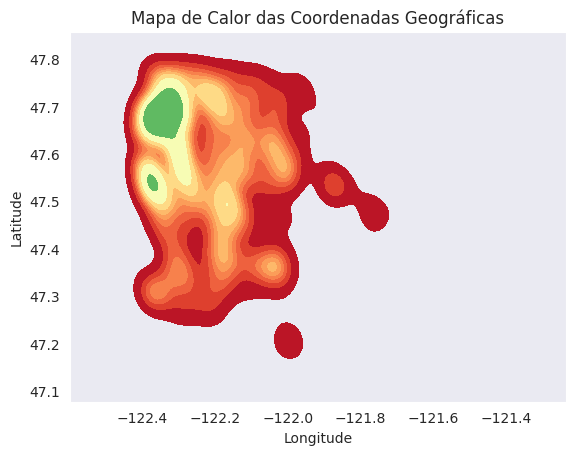

In [20]:
# GMapa de calor das coordenadas geográficas com preços, excluindo os 1% mais caros.

sns.kdeplot(data=non_top_1_perc, x="long", y="lat", fill=True, cmap='RdYlGn')
plt.title('Mapa de Calor das Coordenadas Geográficas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


*Só estou descartando 1% das informações e apesar disso, podemos observar através do mapa de calor, que se confirmam as informações de área habitacional mais cara.*

<Axes: xlabel='long', ylabel='lat'>

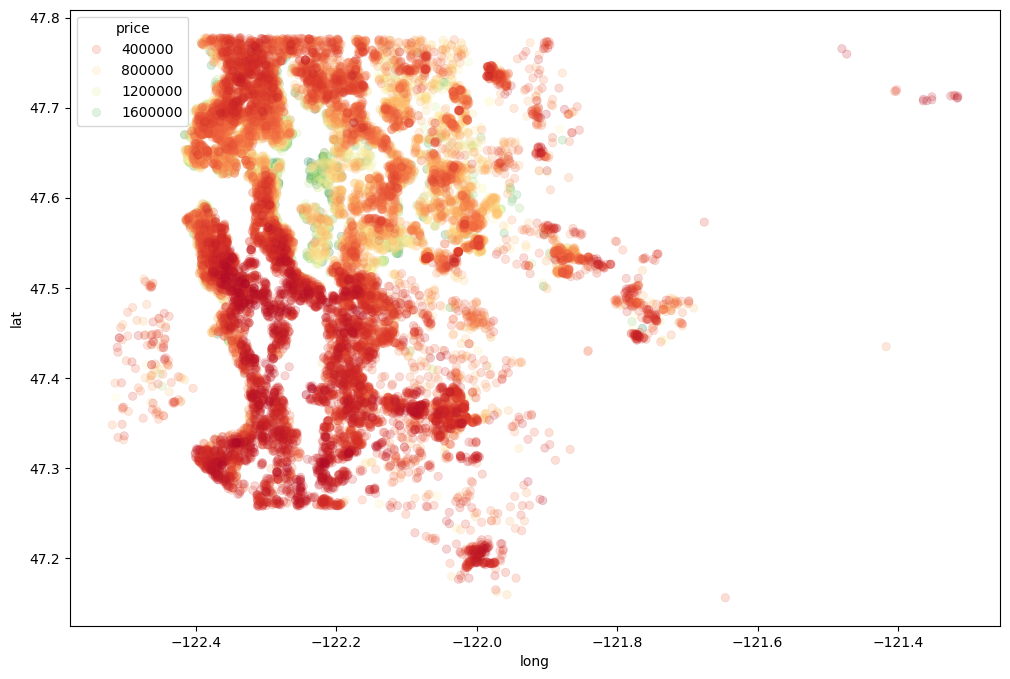

In [ ]:
# Gráfico de dispersão das coordenadas geográficas com preços, excluindo os 1% mais caros.

plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

 *Tons vermelhos indicando preços mais baixos e os tons verdes indicando preços mais altos.*

 <br/>*Observamos o mesmo comportamento no gráfico de dispersão das coordenadas geográficas.*

## *Vamos entender o motivo desta área habitacional ser mais cara.*


<p align=center>
<img src="https://engenharia360.com/wp-content/uploads/2020/05/Capturar-1.png" width="60%"></p>

*Ao conhecermos o mapa de Seattle começamos a entender os GRÁFICOS acima.*

- **Será que os imóveis mais ao norte e a beira da água são os mais caros?**






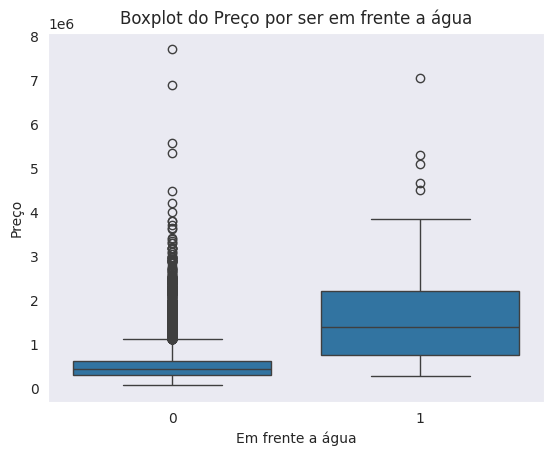

In [21]:
# Cria o bloxplot
sns.boxplot(x='waterfront',y='price',data=df,)

# Adiciona rótulos e título ao gráfico
plt.xlabel('Em frente a água')
plt.ylabel('Preço')
plt.title('Boxplot do Preço por ser em frente a água')

plt.show()

*Parece que se você estiver em frente a água, é provável que seja mais caro.*

- Conclusão:

*Ao conhecermos o mapa de Seattle entendemos os GRÁFICOS acima. Fica claro que os imóveis mais ao norte e a beira da água são os mais caros.*

